# Анализ результатов семестровой работы по ТФКП. 
**Евграфов Михаил. Б03-913С2. 2021 год**

## Содержание:

1. Введение. 
>1.1 Постановка цели работы.  
>1.2 Про Python.  
>1.3 Используемые библиотеки.
2. Разведочный анализ данных.
>2.1 Считывание и подготовка данных.  
>2.2 Boxplot.  
>2.3 Числовое описание данных.  
>2.4 Оценка плотности и построение эмпирической функции распределения.

## Введение. 

#### Постановка цели работы.

Традиционно в ноябре 3 курс МФТИ пишет семестровую контрольную работу по Теории Функции Комплексного Переменного. После получения результатов проведённой контрольной мною было решено провести их анализ, используя методы математической статистики. Итак, **целью** данной работы является анализ результатов семестровой контрольной работы по ТФКП в 2021 году на ФАЛТ(ИАЛТ) с помощью методов математической статистики. 

Для достижения данной цели я разделил работу на две смысловые части:

- Проведение разведочного анализа данных.
- Проверка статистических гипотез. 

Выполнение каждой из этих частей было также разбито на ряд подзадач, формулировка и выполнение которых представлена ниже. 

#### Про Python.

Для выполнения поставленных задач я предпочёл использовать Python, поскольку этот язык программировани обладает большим количесвтом библиотек, сильно упрощающих обработку и визуализации данных. 

#### Используемы библиотеки.

In [1]:
import matplotlib.pyplot as plt
import scipy.stats as sps
import seaborn as sns
import pandas as pd
import numpy as np

`matplotlib.pyplot` - используется для визуализации большинства графиков;  
`scipy.stats` - библиотека с научными расчётами в сфере математической статистики;  
`seqborn` - используется для визуализации *boxplot*;  
`pandas` - библиотека для работы с таблицами и базами данных;  
`numpy` - библиотека для научных расчётов и работ с матрицами.
___

## Разведочный анализ данных.

В данном разделе будет приведён разведовательный анализ данных. Из логических соображений, анализ был разбит на 4 шага:

- Считывание и подготовка данных;
- Построение boxplot для выявления выбросов;
- Числовое описание данных(вычисление размаха, моды, медианы, коэффициента ассиметрии, среднего значения);
- Оценка плотности и построение эмпирической функции распределения. 

Для выполнения обозначенных шагов нам потребуются некоторые вспомогательные функции, облегчающие визуализацию данных. 

### Вспомогательные функции:

**Вычислительные:**

In [2]:
def get_values_probs(df, column):
    
    sorted_data = df.sort_values(column)
    unique_data = sorted_data.drop_duplicates(column)
    unique_data = unique_data[column].to_numpy()
    
    freqs = sorted_data[column].value_counts(normalize=True, sort=False)
    freqs = freqs.to_numpy()
    
    probs = np.cumsum(freqs)
    
    unique_data = np.append(unique_data, unique_data.max() + 1)
    probs = np.append(probs, 1)
    
    return unique_data, probs

**Графические:**

In [3]:
def show_boxplot(df, column):
    
    rng = df[column].max() - df[column].min()
    
    plt.figure(figsize=(rng, 1))
    plt.title('Boxplot', fontsize=15, fontweight='bold')
    
    sns.boxplot(data.loc[:, column], color='pink', saturation=0.5)
    
    plt.xlabel(column, fontsize=10, fontweight='bold')
    plt.grid()
    
    plt.show()

In [4]:
def show_hist(df, column):
    
    k = int(round(1 + np.log(len(df[column]))))
    
    sample = data[column].to_numpy()
    
    fig, ax = plt.subplots(figsize=(12.4, 9.6))
    
    ax.set_title('Histogram', fontsize=20, fontweight='bold')
    ax.set_xlabel(column, fontsize=15, fontweight='bold')
    
    ax.hist(sample, bins=k, color='b', density=True)
    
    ax.grid()
    
    plt.show()

In [5]:
def show_edf(df, column):
    
    values, probs = get_values_probs(df, column)
    
    fig, ax = plt.subplots(figsize=(12.4, 9.6))
    
    ax.set_title('EDF', fontsize=20, fontweight='bold')
    ax.set_xlabel(column, fontsize=15, fontweight='bold')
    ax.set_ylabel('Probability', fontsize=15, fontweight='bold')
    
    ax.step(values, probs, color='b', where='post')
    
    ax.set_xlim(values.min(), values.max())
    ax.set_ylim(0, 1.1)
    
    ax.grid()
    
    plt.show()

### Пункт 1. Считывание и подготовка данных. 

In [6]:
data = pd.read_excel('var3.xlsx')

Посмотрим на наши данные.

In [7]:
data

,Surname,Group,1,2,3,4,5,6,Sum
0,Евгарфов,Б03-913,2.0,3.0,3.0,2,4.0,1.5,15.5
1,Касаткин,Б03-914,0.0,3.0,0.5,1,3.0,1.5,9.0
2,Ахметов,Б03-914,0.5,3.0,1.0,2,4.0,2.0,12.5
3,Каримов,Б03-915,2.0,3.0,3.0,2,3.0,4.0,17.0
4,Чижма,Б03-915,2.0,0.0,2.0,0,3.0,0.0,7.0
5,Бобовский,Б03-915,0.0,3.0,1.0,1,0.0,0.0,5.0
6,Во Ван Чунг,Б03-911,1.5,2.5,0.5,1,4.0,0.5,10.0
7,Гробов,NaN,2.0,3.0,3.0,2,4.0,3.0,17.0
8,Иванов,Б03-912,1.5,3.0,0.5,1,3.0,3.0,12.0
9,Каракуша,Б03-912,2.0,3.0,0.5,2,3.0,0.0,10.5


При пристальном анализе таблицы можно заметить, что 7 значение в колонке `Group` пропущено. Подняв необходимые документы или воспользовавшись социальными связями, можно было бы восполнить этот пробел. Но, т.к. исследование проходит в отрыве от наличия сторонних данных, нам следует избавиться от 7 строки, т.к. она может попортить наши данные или исказить итоговые результаты.

In [8]:
data = data.dropna()
data

,Surname,Group,1,2,3,4,5,6,Sum
0,Евгарфов,Б03-913,2.0,3.0,3.0,2,4.0,1.5,15.5
1,Касаткин,Б03-914,0.0,3.0,0.5,1,3.0,1.5,9.0
2,Ахметов,Б03-914,0.5,3.0,1.0,2,4.0,2.0,12.5
3,Каримов,Б03-915,2.0,3.0,3.0,2,3.0,4.0,17.0
4,Чижма,Б03-915,2.0,0.0,2.0,0,3.0,0.0,7.0
5,Бобовский,Б03-915,0.0,3.0,1.0,1,0.0,0.0,5.0
6,Во Ван Чунг,Б03-911,1.5,2.5,0.5,1,4.0,0.5,10.0
8,Иванов,Б03-912,1.5,3.0,0.5,1,3.0,3.0,12.0
9,Каракуша,Б03-912,2.0,3.0,0.5,2,3.0,0.0,10.5
10,Кудряшов,Б03-911,2.0,2.0,1.5,3,4.0,0.0,12.5


В качестве наблюдаемой случайной величины возьмём сумму балов.

### Пункт 2. Boxplot.

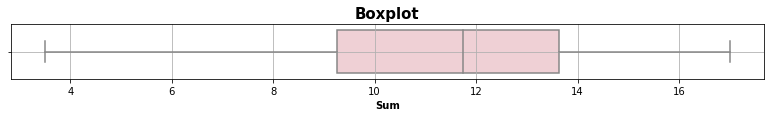

In [9]:
show_boxplot(data, 'Sum')

**Вывод:** в нашей выборке отсутствуют выбросы, нет необходимости в дополнительной коррекции данных.

### Пункт 3. Числовое описание данных. 

**Размах:** $Range = 13.5$

In [10]:
data['Sum'].max() - data['Sum'].min()

13.5

**Моды:** $m_1 = 12.5;  m_2 = 17$

In [11]:
data['Sum'].mode()

0    12.5
1    17.0
dtype: float64

**Медиана:** $med = 11.75$

In [12]:
data['Sum'].median()

11.75

**Коэффициент Асимметрии:** $\alpha \sim -0.38$

In [13]:
sps.skew(data['Sum'].to_numpy(), bias=False)

-0.37997521906965415

### Пункт 4. Оценка плотности и построение эмпирической функции распределения.

**Оценка плотности:**

Для оценки плотности будем использовать гистограмму, поскольку данный способ оценки плотности распределения наиболее нагляден.

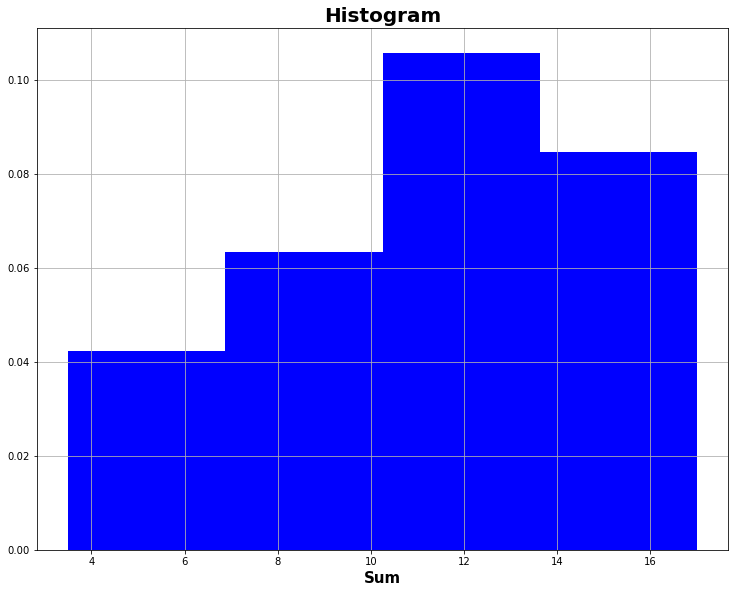

In [14]:
show_hist(data, 'Sum')

**Эмпирическая функция распределения:**

Теперь построим эмпирическую функцию распределения.

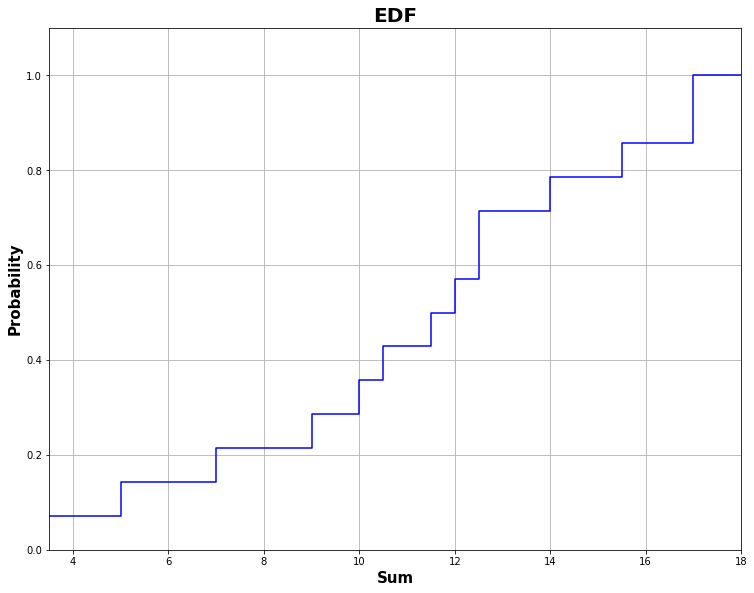

In [15]:
show_edf(data, 'Sum')

___